<a href="https://colab.research.google.com/github/nevetto/EnergyDataset/blob/main/energyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [19]:
energyDataset =pd.read_csv('energydata_complete.csv')
energyDataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
column_names ={"T1":'Relative_Compactness', 'T2': 'Surface_Area',
'T3': 'Wall_Area', 'T4': 'Roof_Area', 'T5': 'Overall_Height',
'T6': 'Orientation', 'T7': 'Glazing_Area',
'T8': 'Glazing_Area_Distribution',
'rv1': 'Heating_Load', 'rv2': 'Cooling_Load'}


In [23]:
energyDataset = energyDataset.rename(columns = column_names)
# print(energyDataset.columns)
 


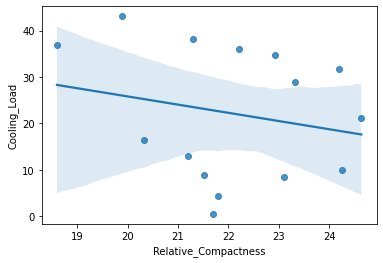

In [70]:
# select a sample of the dataset
simple_linear_reg_energyDataset = energyDataset[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y='Cooling_Load',
data=simple_linear_reg_energyDataset)


In [25]:
energyDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       19735 non-null  object 
 1   Appliances                 19735 non-null  int64  
 2   lights                     19735 non-null  int64  
 3   Relative_Compactness       19735 non-null  float64
 4   RH_1                       19735 non-null  float64
 5   Surface_Area               19735 non-null  float64
 6   RH_2                       19735 non-null  float64
 7   Wall_Area                  19735 non-null  float64
 8   RH_3                       19735 non-null  float64
 9   Roof_Area                  19735 non-null  float64
 10  RH_4                       19735 non-null  float64
 11  Overall_Height             19735 non-null  float64
 12  RH_5                       19735 non-null  float64
 13  Orientation                19735 non-null  flo

In [26]:
energyDataset = energyDataset.dropna()
energyDataset.isnull().sum()

date                         0
Appliances                   0
lights                       0
Relative_Compactness         0
RH_1                         0
Surface_Area                 0
RH_2                         0
Wall_Area                    0
RH_3                         0
Roof_Area                    0
RH_4                         0
Overall_Height               0
RH_5                         0
Orientation                  0
RH_6                         0
Glazing_Area                 0
RH_7                         0
Glazing_Area_Distribution    0
RH_8                         0
T9                           0
RH_9                         0
T_out                        0
Press_mm_hg                  0
RH_out                       0
Windspeed                    0
Visibility                   0
Tdewpoint                    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [27]:
df = energyDataset.drop(['date', 'lights'],axis=1)

df

,Appliances,Relative_Compactness,RH_1,Surface_Area,RH_2,Wall_Area,RH_3,Roof_Area,RH_4,Overall_Height,RH_5,Orientation,RH_6,Glazing_Area,RH_7,Glazing_Area_Distribution,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Heating_Load,Cooling_Load
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [71]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

0        0.265449
1        0.372083
2        0.572848
3        0.908261
4        0.201611
           ...   
19730    0.861981
19731    0.985726
19732    0.583979
19733    0.126371
19734    0.682391
Name: Heating_Load, Length: 19735, dtype: float64

In [30]:
#Now, we split our dataset into the training and testing dataset. Recall that we
# had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.251

In [72]:
print('predicted value is', predicted_values)

predicted value is [0.50693611 0.49202423 0.50115604 ... 0.5017982  0.49967529 0.50636369]


In [33]:
# Residual Sum of Squares (RSS) 
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

497.187

In [36]:
# Root Mean Square Error (RMSE) 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 4) 

0.2898

In [43]:
# R-Squared 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

-0.004

In [47]:
# Ridge Regression 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_val = ridge_reg.fit(x_train, y_train)
ridge_val

Ridge(alpha=0.4)

In [48]:
# Feature Selection and Lasso Regression 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.001)

In [68]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name, **kwargs):
#this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df
  linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
  ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
  lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
  final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
  final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
